In [ ]:
"""
데이터프레임 정렬:sort_values()
튜플 정렬:sorted()
리스트 정렬:list.sort(),sorted(list)
"""

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
df=pd.DataFrame({"seq":[10,30,np.nan],
             "name":["park","kim","choi"],
             "age":[25,35,22]})
df

,seq,name,age
0,10.0,park,25
1,30.0,kim,35
2,NaN,choi,22


In [12]:
df.sort_values(by="seq",ascending=False)
df.sort_values(by="seq",ascending=False, inplace=True, na_position="first")
df

,seq,name,age
2,NaN,choi,22
1,30.0,kim,35
0,10.0,park,25


In [31]:
tup=[(1,"kim",25),(3,"lee",20),(2,"park",15)]
#sorted(튜플변수, 정렬 기준)
sorted(tup)
sorted(tup, key=lambda p:p[0])
sorted(tup, key=lambda p:p[1])
sorted(tup, key=lambda p:p[2],reverse=True)

[(1, 'kim', 25), (3, 'lee', 20), (2, 'park', 15)]

In [25]:
myList=[0,1,2,5,4,7,8,6,3]
sorted(myList)
myList
myList.sort()
myList
sorted(myList,reverse=True)
myList

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [38]:
s1=pd.Series([3,1,4,2,5])
s1
s1[2]
s1[0:3]#3,1,4 출력
#열 평균값보다 큰 데이터만 추출
s1[s1>s1.mean()]
s1[[4,2]]

4    5
2    4
dtype: int64

In [39]:
s=pd.Series([10,20,30,40,50],index=['a','b','c','d','e'])
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [45]:
s['a']
s[['a','c','e']]
#2개 이상 참조시 대괄호 2중
s.get(['a','c','e'])
s['c']=300
'c' in s
'z' in s

False

In [53]:
df=pd.DataFrame({
    'c1':[1,2,3],
    'c2':[4,5,6],
    'c3':[7,8,np.nan]
},index=['r1','r2','r3'])
df.info() #R언어 str()
df.index
df.columns

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, r1 to r3
Data columns (total 3 columns):
c1    3 non-null int64
c2    3 non-null int64
c3    2 non-null float64
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


Index(['c1', 'c2', 'c3'], dtype='object')

In [55]:
df13=pd.DataFrame(df,index=['r1','r3'])
df13

,c1,c2,c3
r1,1,4,7.0
r3,3,6,NaN


In [56]:
dfc13=pd.DataFrame(df,columns=['c1','c3'])
dfc13
#c1과 c3열 추출 -> 데이터프레임

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [58]:
#r3, r1행과 c3,c1열을 추출
rfc13=pd.DataFrame(df,index=['r3','r1'],columns=['c3','c1'])
rfc13
#저장하는 순서대로 출력

,c3,c1
r3,NaN,3
r1,7.0,1


In [66]:
#추가 기존방법
df['c4']=df['c1']+df['c2']
df
df=df.assign(c5=df['c1']*df['c2'])#assign사용 추가
df
df=df.assign(c6=lambda x:x.c1-x.c2)#x에는 df가 전달
df

,c1,c2,c3,c4,c5,c6
r1,1,4,7.0,5,4,-3
r2,2,5,8.0,7,10,-3
r3,3,6,NaN,9,18,-3


In [77]:
#df.drop(), del명령 : 데이터프레임 컬럼 삭제
df.drop(['c4'],axis=1)
#c2, c4, c5열을 제거
df.drop(['c2','c4','c5'],axis=1)
#r2행 제거
df.drop(['r2'],axis=0) #axis=0 생략 가능
# drop 행, 열 모두 삭제 가능!! but dell은 컬럼만 삭제 가능!!

,c1,c2,c3,c4,c5,c6
r1,1,4,7.0,5,4,-3
r3,3,6,NaN,9,18,-3


In [79]:
del df['c4']
df

,c1,c2,c3,c5,c6
r1,1,4,7.0,4,-3
r2,2,5,8.0,10,-3
r3,3,6,NaN,18,-3


In [83]:
df
[df['c1']<=2]#각 행에 대해 true false 출력
df[df['c1']<=2]#true 행에 대해서만 출력

,c1,c2,c3,c5,c6
r1,1,4,7.0,4,-3
r2,2,5,8.0,10,-3


In [84]:
col_sel=['c1','c3']
df[col_sel]

,c1,c3
r1,1,7.0
r2,2,8.0
r3,3,NaN


In [97]:
#numpy#수치데이터를 연산함에 있어 빠르고 경제적으로 할 수 있도록
#제공하는 모듈
#numpy가 빠른이유!!? -> ndarray(벡터연산) n디멘션
arr1=np.array([1,2,3,4])
mylist=[5,6,7,8]
arr2=np.array(mylist)
arr1.shape
arr1.dtype

# mylist=np.asarray(mylist)
# type(mylist)

# np.asfarray(mylist)
mylist=[5,6,7,np.nan]
np.asarray_chkfinite(mylist)
#배열로 변환시 무한수(inf),
#결측값(NaN)이 있는지 확인해라 있으면


ValueError: array must not contain infs or NaNs

In [101]:
np.zeros(5)#float타입의 0으로 초기화
np.ones(10)#float타입의 1으로 초기화
np.ones(5)*2#2부터는 이러한 형식으로 초기화 #벡터화 연산
np.empty(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [104]:
np.zeros((2,5)) #다차원 배열초기화
np.ones((2,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [109]:
arr=np.arange(12)
arr=arr.reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [111]:
np.zeros_like(arr)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [112]:
np.ones_like(arr)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [326]:
np.eye(3)#단위행렬(항등):대각요소 1, 나머지 0
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [119]:
np.random.seed(seed=777)
np.random.normal(size=5)
#정규분포로부터 개수가 1인 무작위 샘플 추출
np.random.normal(size=(2,5))

array([[ 0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907],
       [ 0.54480945,  1.8951609 , -0.76935745, -1.40309592, -0.63246751]])

In [ ]:
"""
이항분포 
모집단 = 확률분포 -> 분위수에 대한 특정 확률에 대당되는 분위수 계산

확률분포 : 연속형 확률 분포, 이산형 확률 분포
연속형 확률 분포:정규분포, t분포, 균등 분포
이산형 : 이항분포, 포아송, 초기하분포

이항분포? 성공확률이 p인 베르누이시행을 n번 반복했을 때 성공횟수를 
x라고 하면, 확률변수 x는 모수 n과 p인 이항분포를 따른다.
이항분포=nCx*p의x승*(1-p)의n-x승

베루누이시행 : 각 시행마다 성공/실패의 경우의 수만 나오는 시행

"""

In [120]:
np.random.binomial(n=1,p=0.5,size=20)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [140]:
#numpy:boolean,int8,float,string
#머신러닝 대부분 float 타입
#숫자형/문자형
x=np.array([3,2,4,5])
x.dtype

x=np.array([3.1,2.5,4.1,5.2],dtype=np.float32)
x.dtype
x=np.array([3.1,2.5,4.1,5.2],dtype=np.int32)
x.dtype
x
x=np.int32([1.5,2.4])
x

array([1, 2])

In [141]:
#데이터 타입 변환
#데이터.astype(변환타입)
x
x.astype(np.float64)

array([1., 2.])

In [147]:
x=np.float64([3,2,1])
x
#int64로 변경
x.astype(np.int64)
x=x.astype(np.string_)
x.dtype

dtype('S32')

In [149]:
#두 배열의 차원이 같아야 연산
#차원이 다르면 broadcasting을 통해 차원을 동일하게...
x=np.array([1.,1.,2.,2.])
y=np.array([1.,2.,3.,4.])

In [159]:
y+1
#배열+스칼라
y/2
y//2
y%2
y**2

array([ 1.,  4.,  9., 16.])

In [169]:
a=np.arange(100000)
a

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [170]:
%timeit a+1 # 뒤 문장 해결하는데에 얼마나 걸리는지

49.9 µs ± 768 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [171]:
%timeit [i+1 for i in a]

34.7 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [172]:
print(x)
print(y)
x+y
x-y
x*y
x/y
x//y
x%y
x**y

[1. 1. 2. 2.]
[1. 2. 3. 4.]


array([ 1.,  1.,  8., 16.])

In [178]:
x
y
np.equal(x,y)
np.not_equal(x,y)
np.greater(x,y)#x>y
np.greater_equal(x,y) #x>=y
np.less(x,y)#x<y
np.less_equal(x,y)#x<=y
#배열 전체 비교
np.array_equal(x,y)
np.array_equal(x,x)

True

In [183]:
x+=y#x-=y, x*=y x**=y 다 가능
x

array([ 3.,  5.,  8., 10.])

In [187]:
x=np.array([1,1,0,0])
y=np.array([1,0,1,0])
np.logical_and(x,y)#두 데이터 모두 1일때만 참
np.logical_or(x,y)
np.logical_xor(x,y)

array([False,  True,  True, False])

In [189]:
#소속 여부 확인? in, not in
#객체 in 배열: 배열에 객체가 있으면 true
a='x'
b=np.array(['x','y'])

In [190]:
a in b#True

True

In [191]:
'z' not in b

True

In [194]:
x=np.array([1.,1.,2.,2.])
y=np.arange(5)
#x+y 에러: 두 배열간 차원이 같아야 연산 가능


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [198]:
ar=np.array([1,2,3,4])
ar.shape #      +
ar+1 # 1=>  1 1 1 1 => [2 3 4 5] 브로드캐스팅

array([2, 3, 4, 5])

In [199]:
df=pd.DataFrame({'x1':[1,2,3], 'x2':[4,5,6]})
df

,x1,x2
0,1,4
1,2,5
2,3,6


In [200]:
df+1

,x1,x2
0,2,5
1,3,6
2,4,7


In [205]:
ar=np.arange(12).reshape(4,3)
print(ar)
ar2=np.array([1,2,3])
print(ar2)
print(ar+ar2)
#=> 1 2 3 
#   1 2 3
#   1 2 3

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[1 2 3]
[[ 1  3  5]
 [ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


In [207]:
ar=np.arange(12).reshape(4,3)
print(ar)
ar2=np.array([1,2,3,4]).reshape(4,1)
print(ar2)
print(ar+ar2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[1]
 [2]
 [3]
 [4]]
[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]
 [13 14 15]]


In [302]:
#타이타닉 데이터 활용
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
#EDA(Exploratory Data Analysis)
train.head(80)
train.shape
train.info()
#데이터프레임 문자 object 타입 넘파이는 str 타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [261]:
print(train.isnull().sum(axis=0),"\n")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [272]:
def my_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
#     train['Sex'].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind="bar",stacked=True, figsize=(10,5))
#생존한 사람들의 성별만나옴

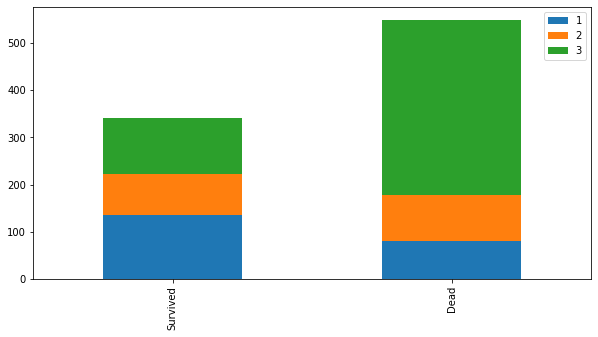

In [273]:
import matplotlib.pyplot as plt
my_chart('Pclass')

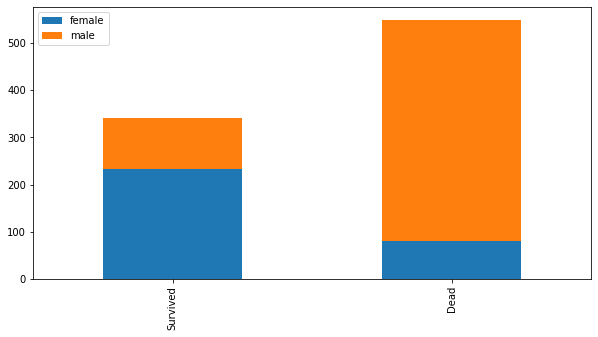

In [264]:
my_chart('Sex')

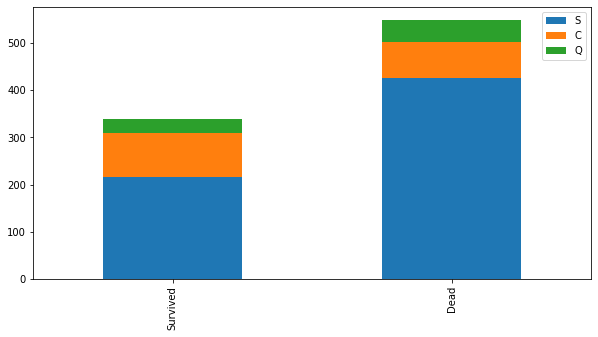

In [265]:
my_chart("Embarked")

In [266]:
train['title']=train['Name'].str.extract(" ([A-Za-z]+)\.")
print(train['title'].value_counts())
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3}
train['title']=train['title'].map(title_mapping)
print(train['title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Lady          1
Don           1
Sir           1
Jonkheer      1
Capt          1
Ms            1
Mme           1
Name: title, dtype: int64
0.0    517
1.0    182
2.0    125
3.0     40
Name: title, dtype: int64


In [267]:
train.drop('Name',axis=1,inplace=True)#inplace원본 데이터에 영향줌
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0.0


In [269]:
#Sex->male:0, female:1
sm={"male":0, "female":1}
train['Sex']=train['Sex'].map(sm)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,NaN,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,NaN,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,NaN,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,NaN,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,NaN,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,NaN,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,NaN,26.0,0,0,111369,30.0000,C148,C,0.0


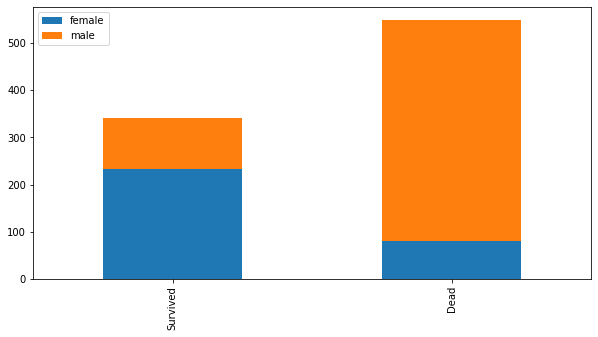

In [276]:
my_chart('Sex')

In [301]:
# print(train['Age'])
#16세이하:0, 16~26이하:1, 26~36이하:2, 36~62:3, 62초과:4
#주의!! 원본데이터 변경됨!!
train.loc[train['Age']<=16,'Age']=0
train.loc[(train['Age']>16)&(train['Age']<=26),'Age']=1
train.loc[(train['Age']>26)&(train['Age']<=36),'Age']=2
train.loc[(train['Age']>36)&(train['Age']<=62),'Age']=3
train.loc[train['Age']>62,'Age']=4
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C148,C


In [303]:
bins=[0,16,26,36,62,100]
labels=["0",'1','2','3','4']
cats=pd.cut(train['Age'],bins,labels=labels)
cats

0        1
1        3
2        1
3        2
4        2
      ... 
886      2
887      1
888    NaN
889      1
890      2
Name: Age, Length: 891, dtype: category
Categories (5, object): [0 < 1 < 2 < 3 < 4]

In [304]:
#문제1
import pandas as pd
import numpy as np

np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [306]:
#문제2
ar=np.zeros(10)
ar[4]=1
ar

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [308]:
#문제3
arr3=np.arange(10,50)
arr3

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [318]:
#문제4
list(reversed(arr3))

[49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10]

In [320]:
#문제5
arr5=np.arange(0,9)
arr5=arr5.reshape(3,3)
arr5

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [324]:
#문제6
ar=np.array([1,2,0,0,4,0])
ar[ar>0]

array([1, 2, 4])

In [327]:
#문제7
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [346]:
#문제8~10
ar9=np.random.randn(3,3)
print(ar9)
print(ar9.max())
print(ar9.min())
print(ar9.mean(axis=1))#행평균
print(ar9.mean(axis=0))#열평균

[[-0.58434683  1.07436428  0.62100654]
 [ 1.02970471 -0.79996222 -0.4059395 ]
 [ 1.07999689  1.57175215 -0.56380064]]
1.5717521486874309
-0.7999622239441911
[ 0.37034133 -0.05873234  0.6959828 ]
[ 0.50845159  0.61538474 -0.11624453]


In [350]:
#문제11
exinput=np.array([[1,2,4,4],[2,3,5,7],[3,1,6,5],[7,3,8,6]])
exinput

array([[1, 2, 4, 4],
       [2, 3, 5, 7],
       [3, 1, 6, 5],
       [7, 3, 8, 6]])